In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D

In [2]:
figdir = '/Users/annabroido/Dropbox/Research/ICONProject/1Scale_Free_Networks/writing/'
fulldf = pd.read_pickle('/Users/annabroido/Dropbox/Research/LRTAnalysis/SFAnalysis/local/newhyps.p')
analysis = pd.read_pickle('/Users/annabroido/Dropbox/Research/LRTAnalysis/SFAnalysis/local/newanalysis.p')
analysis = analysis.query('alpha != ""')
analysis = analysis.query("Domain != 'Economic'")

In [15]:
ALMOST_BLACK = '0.125'
DARK = '0.4'
GRAY_COLOR = '0.5'
ALL_COLOR = (0.156, 0.254, 0.466)
SUPERWEAK_COLOR = (0.647, 0.772, 0.972)
WEAKEST_COLOR = (0.419, 0.627, 0.960)
WEAK_COLOR = (0.258, 0.525, 0.85)
STRONG_COLOR = (0.223, 0.368, 0.674)
STRONGEST_COLOR = (0.156, 0.254, 0.466)
LABEL_SIZE = 13
TICK_SIZE = 13

In [4]:
def make_domain_ploth(ax, df, xlab=False, any=False, cutoff=False, allrats=[]):
    tot = float(len(df))
    if any:
        strongest = len(df.query('Strong_Any==True'))
        strong = len(df.query('Strong_Any==True'))
        weak = len(df.query('Weak_Any==True'))
        weakest = len(df.query('Weakest_Any==True'))
        superweak = len(df.query('Super_Weak_Any==True'))
        fail = (len(df.query("Weakest_Any==False").query("Super_Weak_Any==False")))
    elif cutoff:
        strongest = len(df.query('Strongest_No_PLwC==True'))
        strong = len(df.query('Strong_No_PLwC==True'))
        weak = len(df.query('Weak_PLwC==True'))
        weakest = len(df.query('Weakest_PLwC==True'))
        superweak = len(df.query('Super_Weak_PLwC==True'))
        fail = (len(df.query("Weakest_Any==False").query("Super_Weak_Any==False")))
    else:
        strongest = len(df.query('Strongest==True'))
        strong = len(df.query('Strong==True'))
        weak = len(df.query('Weak==True'))
        weakest = len(df.query('Weakest==True'))
        superweak = len(df.query('Super_Weak==True'))
        fail = (len(df.query("Weakest==False").query("Super_Weak==False")))
    
    counts = [strongest, strong, weak, weakest, superweak, fail]
    barheights = [count/tot for count in counts]
    if allrats !=[]:
        allticks = [barheights[i]-allrats[i] for i in range(len(counts))]
        signs = ['+' if allticks[i] >= 0 else ' -' for i in range(len(allticks))]

    width = 4
    totwid = 4
    xlocs = np.arange(0,4*totwid,totwid)
    xlocs = np.append(xlocs, xlocs[-1]+totwid+width/2.)
    xlocs = np.append(xlocs, xlocs[-1]+totwid+width/2.)

    colors=[STRONGEST_COLOR, STRONG_COLOR, WEAK_COLOR, WEAKEST_COLOR, SUPERWEAK_COLOR, GRAY_COLOR]
    ylabels = ['Strongest', 'Strong', 'Weak', 'Weakest', 'Super-Weak', 'Not\n Scale-Free' ]
    yticks = xlocs+width/2.
    for i in range(6):
        ax.barh(bottom=xlocs[i],width=barheights[i], height=width, color = colors[i],edgecolor='w')
        if barheights[i]>0.65:
            ax.text(barheights[i]-0.28,yticks[i],'%d (%.2f)' %(int(counts[i]) ,barheights[i]) , fontsize=LABEL_SIZE, ha='left', va='center')
        else:
            ax.text(barheights[i]+0.02,yticks[i],'%d (%.2f)' %(int(counts[i]) ,barheights[i]) , fontsize=LABEL_SIZE, ha='left', va='center')
        if allrats!=[]:
            ax.text(1.0, yticks[i], '%s %.2f' %(signs[i], np.abs(allticks[i])), fontsize=LABEL_SIZE, ha='left', va='center')
            if np.abs(allticks[i]) <=0.025:
                ax.scatter(0.97, yticks[i], marker='>', s=60, color='0.4')
            elif signs[i]=='+':
                ax.scatter(0.97, yticks[i], marker='^', s=60, color='green')
            else:
                ax.scatter(0.97, yticks[i], marker='v', s=60, color='red')
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)
#     ax.set_yticklabels([])
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,30)
    if xlab:
        ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    else:
        ax.set_xticks([])
    ax.axhline((xlocs[3]+width + xlocs[4])/2., color=ALMOST_BLACK, linewidth=2)
    ax.axhline((xlocs[4]+width + xlocs[5])/2., color=ALMOST_BLACK, linewidth=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)

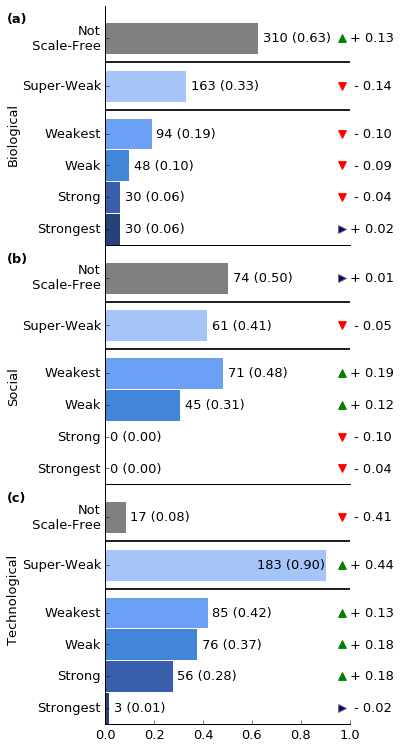

In [5]:
#fig, [[ax, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(8,9))
fig, [ax, ax3, ax5] = plt.subplots(3,1,figsize=(5,10.5))
# for tickers:
tot = float(len(fulldf))
allstrongest = len(fulldf.query('Strongest==True'))/tot
allstrong = len(fulldf.query('Strong==True'))/tot
allweak = len(fulldf.query('Weak==True'))/tot
allweakest = len(fulldf.query('Weakest==True'))/tot
allsuperweak = len(fulldf.query('Super_Weak==True'))/tot
allfail = (len(fulldf.query("Weakest==False").query("Super_Weak==False")))/tot
allrats = [allstrongest, allstrong, allweak, allweakest, allsuperweak, allfail]

query = 'Domain =="Biological"' 
df = fulldf.query(query)
make_domain_ploth(ax, df, allrats=allrats)

query = 'Domain =="Social"' 
df = fulldf.query(query)
make_domain_ploth(ax3, df, allrats=allrats)

query = 'Domain =="Technological"' 
df = fulldf.query(query)
make_domain_ploth(ax5, df, xlab=True, allrats=allrats)

ax.text(-0.4, 10, 'Biological' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
ax3.text(-0.4, 10, 'Social' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
ax5.text(-0.4, 10, 'Technological' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
ax.text(-0.4, 28, '(a)' , fontsize=LABEL_SIZE, ha='left', weight='bold')
ax3.text(-0.4, 28, '(b)' , fontsize=LABEL_SIZE, ha='left', weight='bold')
ax5.text(-0.4, 28, '(c)' , fontsize=LABEL_SIZE, ha='left', weight='bold')


plt.tight_layout( w_pad=0.1, h_pad=0.1)

plt.savefig(figdir + 'newsfdomains_withticks.eps',format='eps', bbox_inches='tight', dpi=1000)
plt.show()

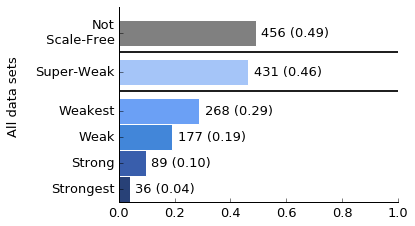

In [6]:
# full corpus
#fig, [[ax, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(8,9))
fig, ax = plt.subplots(1,1,figsize=(5,3.5))

make_domain_ploth(ax, fulldf, True)
ax.text(-0.4, 10, 'All data sets' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.savefig(figdir + 'newsfall.eps', format='eps', bbox_inches='tight', dpi=1000)
plt.show()

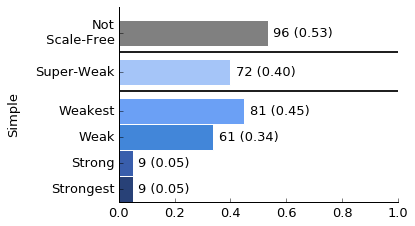

In [7]:
# simple graphs
simpledf = analysis.query('Weighted==False & Directed == False & Bipartite == False & Multigraph == False & Multiplex == False')
simplehyps = fulldf.loc[np.unique(simpledf.fp_gml)]
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
make_domain_ploth(ax, simplehyps, xlab=True)
ax.text(-0.4, 10, 'Simple' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.savefig(figdir + 'newsfsimple.eps', format='eps', bbox_inches='tight', dpi=1000)
plt.show()

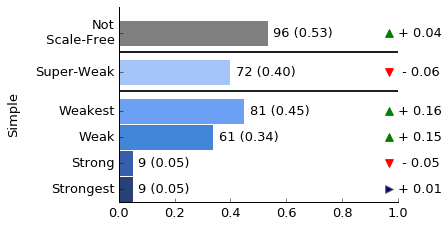

In [8]:
# simple graphs with ticks
simpledf = analysis.query('Weighted==False & Directed == False & Bipartite == False & Multigraph == False & Multiplex == False')
simplehyps = fulldf.loc[np.unique(simpledf.fp_gml)]
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
make_domain_ploth(ax, simplehyps, xlab=True, allrats=allrats)
ax.text(-0.4, 10, 'Simple' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.savefig(figdir + 'newsfsimple_withticks.eps', format='eps', bbox_inches='tight', dpi=1000)
plt.show()

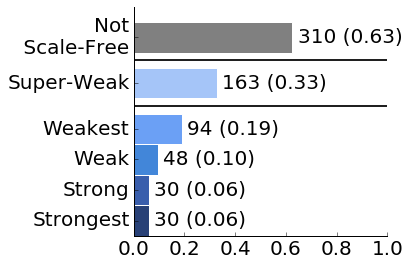

In [9]:
#for presentations
LABEL_SIZE = 20
TICK_SIZE = 20
fig, ax = plt.subplots(1,1,figsize=(5.5,3.5))
query = 'Domain =="Biological"' 
df = fulldf.query(query)
make_domain_ploth(ax, df, True)
# ax.text(-0.4, 10, 'Biological' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.tight_layout(pad=0, w_pad=0, h_pad=1)
plt.show()

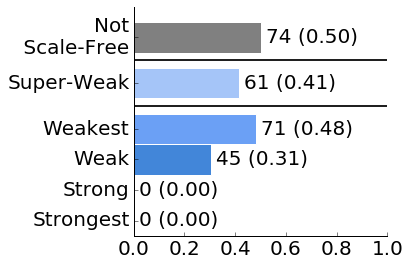

In [10]:
fig, ax3 = plt.subplots(1,1,figsize=(5.5,3.5))
query = 'Domain =="Social"' 
df = fulldf.query(query)
make_domain_ploth(ax3, df, True)
# ax3.text(-0.4, 10, 'Social' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.tight_layout(pad=0, w_pad=0, h_pad=1)
plt.show()

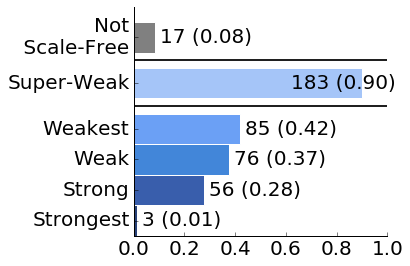

In [11]:
fig, ax5 = plt.subplots(1,1,figsize=(5.5,3.5))
query = 'Domain =="Technological"' 
df = fulldf.query(query)
make_domain_ploth(ax5, df, True)
# ax5.text(-0.4, 10, 'Technological' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.tight_layout(pad=0, w_pad=0, h_pad=1)
plt.show()

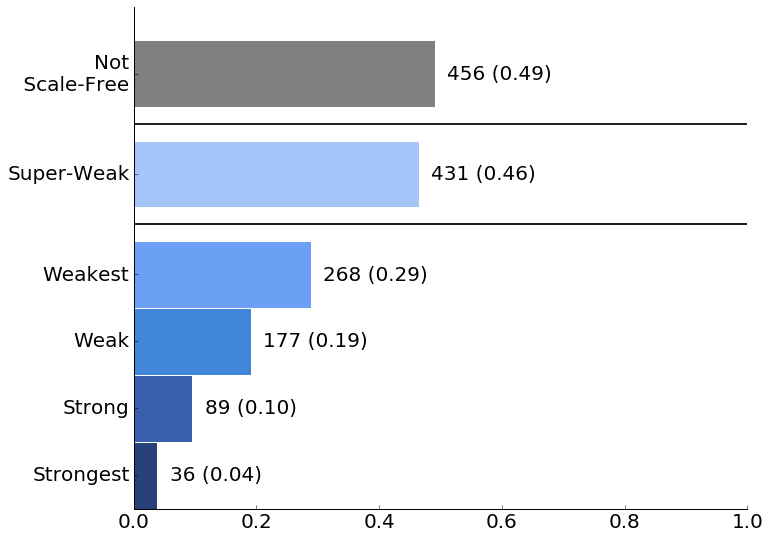

In [12]:
# full corpus
#fig, [[ax, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(8,9))
fig, ax = plt.subplots(1,1,figsize=(11,9))

make_domain_ploth(ax, fulldf, True)
plt.show()

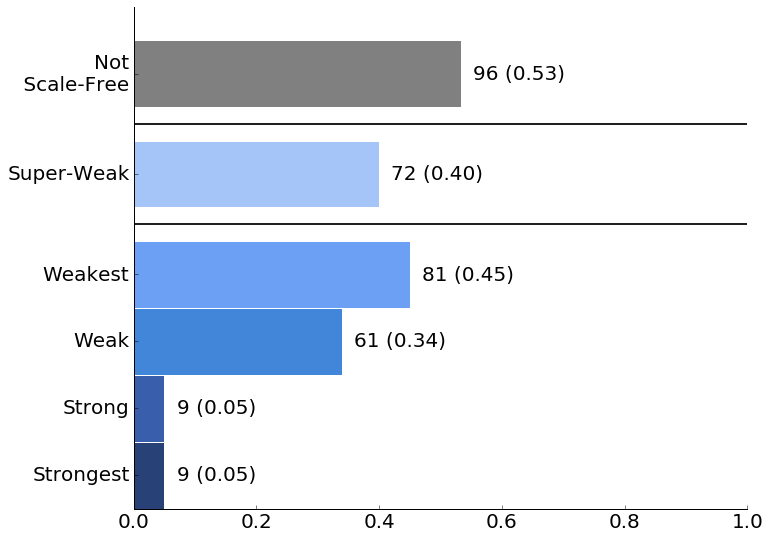

In [13]:
# simple graphs
simpledf = analysis.query('Weighted==False & Directed == False & Bipartite == False & Multigraph == False & Multiplex == False')
simplehyps = fulldf.loc[np.unique(simpledf.fp_gml)]
fig, ax = plt.subplots(1,1,figsize=(11,9))
make_domain_ploth(ax, simplehyps, True)
plt.show()

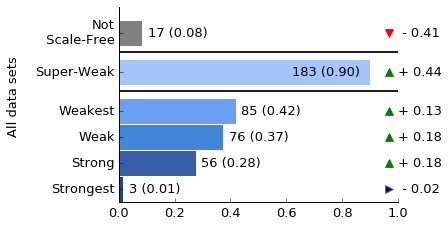

In [16]:
# technological
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
query = 'Domain=="Technological"'
df = fulldf.query(query)
make_domain_ploth(ax, df, xlab=True, any=False, allrats=allrats)
ax.text(-0.4, 10, 'All data sets' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.savefig(figdir + 'technologial_withticks.eps', format='eps', bbox_inches='tight', dpi=1000)
plt.show()

In [23]:
# df.columns

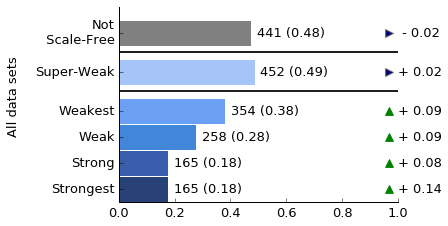

In [17]:
# all datasets, any deg seq
fig, ax = plt.subplots(1,1,figsize=(5,3.5))

make_domain_ploth(ax, fulldf, xlab=True, any=True, allrats=allrats)
ax.text(-0.4, 10, 'All data sets' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.savefig(figdir + 'newsfany_withticks.eps', format='eps', bbox_inches='tight', dpi=1000)
plt.show()

In [18]:
# all datasets, pl removed
fig, ax = plt.subplots(1,1,figsize=(5,3.5))

make_domain_ploth(ax, fulldf, xlab=True, cutoff=True)
ax.text(-0.4, 10, 'All data sets' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.savefig(figdir + 'sfnoplwc.eps', format='eps', bbox_inches='tight', dpi=1000)
plt.show()

UndefinedVariableError: name 'Strongest_No_PLwC' is not defined

In [24]:
fulldf.columns

Index([u'Strongest', u'Strong', u'Weak', u'Weakest', u'Super_Weak',
       u'Strong_No_PLwC', u'Strong_No_PLwC_No_Range', u'Strongest_No_PLwC',
       u'No_PLwC_No_Range_Strongest', u'Weak_PLwC', u'Weakest_PLwC',
       u'Super_Weak_PLwC', u'Strong_Any', u'Strong_Any_noplwc',
       u'Strong_Any_nobounds', u'Weak_Any', u'Weakest_Any', u'Super_Weak_Any',
       u'Domain', u'Subdomain', u'median_alpha', u'n', u'median_ntail'],
      dtype='object')

In [18]:
['+' if x > 0 else '-' for x in [1,-1]]

['+', '-']